# In plot_attempts_cleaner, the majority of ka1's inflow scans that i had the code sort out were not vads. i need to use the scan log to identify the vads and probably use pandas :(

In [47]:
import pyart
import numpy as np
from datetime import datetime, timedelta
import glob
# from radarcalc import *
import matplotlib.pyplot as plt
import pandas as pd
import metpy.calc as mpcalc
import metpy
import metpy.plots
from metpy.units import units
import cartopy.crs as ccrs
import gc
from astropy.convolution import convolve
from boto.s3.connection import S3Connection
import tempfile
import copy
import matplotlib
import xarray as xr
import math
from datetime import datetime

In [48]:
d=20220523
pwd = '/Users/juliabman/Desktop/research2024'
df1 = pd.read_csv(f'{pwd}/{d}_Ka1_scan_log.txt')
df2 = pd.read_csv(f'{pwd}/{d}_Ka2_scan_log.txt')

#vads_ka1 = pd.DataFrame()
#vads_ka2 = pd.DataFrame()
vads_ka1 = []
vads_ka2 = []

begin_time = np.minimum(datetime.strptime(df1.Datetime[0],'%Y-%m-%d %H:%M:%S'),datetime.strptime(df2.Datetime[0],'%Y-%m-%d %H:%M:%S'))
end_time = np.maximum(datetime.strptime(df1.Datetime[len(df1)-1],'%Y-%m-%d %H:%M:%S'),datetime.strptime(df2.Datetime[len(df2)-1],'%Y-%m-%d %H:%M:%S'))
grid = np.zeros((2,int((end_time-begin_time).seconds+1)))
grid = np.where(grid==0,np.nan,np.nan)

for i,r in enumerate(['Ka1','Ka2']):
    df = pd.read_csv(f'{pwd}/{d}_{r}_scan_log.txt')
    vad = df['Scantype'].value_counts()['vad']
    survey = df['Scantype'].value_counts()['survey']
    rhi = df['Scantype'].value_counts()['rhi']
    ppi = df['Scantype'].value_counts()['ppi']
    print(vad,survey,rhi,ppi,vad+survey+rhi+ppi)
    
    if r == 'Ka1':
        vad_rows_ka1 = df[df.Scantype == 'vad']

    if r == 'Ka2':
        vad_rows_ka2 = df[df.Scantype == 'vad']

    #vad_rows = df[df.Scantype == 'vad']
        

    vad_df = df.where(df['Scantype']=='vad').dropna(axis = 0, how = 'all')
    survey_df = df.where(df['Scantype']=='survey').dropna(axis = 0, how = 'all')
    ppi_df = df.where(df['Scantype']=='ppi').dropna(axis = 0, how = 'all')
    rhi_df = df.where(df['Scantype']=='rhi').dropna(axis = 0, how = 'all')

155 40 62 50 307
176 8 36 105 325


In [49]:
df1

,Datetime,Scantype,Angles,Ranges,Duration,Latitude,Longitude,Heading,Speed,Distance,Deployment
0,2022-05-23 20:18:19,vad,[37. 45.],9972.0,27.0,33.593816,-102.339719,270.842857,40.700357,0.000000,0
1,2022-05-23 20:18:49,vad,[37. 45.],9972.0,27.0,33.593902,-102.346550,270.853214,41.957143,633.466135,0
2,2022-05-23 20:19:19,vad,[37. 45.],9972.0,26.0,33.593976,-102.353427,270.864074,42.215926,637.776940,0
3,2022-05-23 20:19:48,vad,[37. 45.],9972.0,27.0,33.594052,-102.359624,277.545714,27.442857,574.632380,0
4,2022-05-23 20:20:19,vad,[37. 45.],9972.0,26.0,33.594721,-102.361347,179.523333,9.963333,176.252456,0
...,...,...,...,...,...,...,...,...,...,...,...
302,2022-05-24 03:08:50,rhi,[263.2 273.2 283.2 293.2 303.2 313.2 323.2 333...,19965.0,76.0,33.592530,-102.035702,93.200000,0.001688,0.326354,10
303,2022-05-24 03:10:11,rhi,[263.2 273.2 283.2 293.2 303.2 313.2 323.2 333...,19965.0,76.0,33.592530,-102.035702,93.200000,0.001429,0.460026,10
304,2022-05-24 03:11:32,rhi,[263.2 273.2 283.2 293.2 303.2 313.2 323.2 333...,19965.0,76.0,33.592530,-102.035702,93.200000,0.007662,0.882721,10
305,2022-05-24 03:12:53,rhi,[263.2 273.2 283.2 293.2 303.2 313.2 323.2 333...,19965.0,76.0,33.592530,-102.035702,93.200000,0.003636,0.313107,10


In [314]:
scantype = df1.Scantype
datetime = df1.Datetime

In [312]:
corrected_vehicle_vads_ka1 = []
corrected_vads_file_names_ka1 = []
radar_array_ka1 = []
velmean_array_ka1 = []
velvar_array_ka1 = []
bearmean_array_ka1 = []
latmean_array_ka1 = []
latvar_array_ka1 = []
lonmean_array_ka1 = []
lonvar_array_ka1 = []

for uncorrected_vad in all_dealiased_data_ka1:
    print(uncorrected_vad)
    read = pyart.io.read_cfradial(uncorrected_vad)
    
    radar, velmean, velvar, bearmean, bearvar, latmean, latvar, lonmean, lonvar = vehicle_correction_vad(read, ka1gps)
    #corrected_vehicle_vads_0523.append(correction_function)
    radar_array_ka1.append(radar)
    velmean_array_ka1.append(velmean)
    velvar_array_ka1.append(velvar)
    bearmean_array_ka1.append(bearmean)
    latmean_array_ka1.append(latmean)
    latvar_array_ka1.append(latvar)
    lonmean_array_ka1.append(lonmean)
    lonvar_array_ka1.append(lonvar)
    corrected_vads_file_names_ka1.append(uncorrected_vad)

/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523201819_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523201849_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523201919_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523201948_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523202019_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523205632_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523205701_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523205730_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523205759_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523205828_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523205857_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523205926_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka1220523205955_dealiased.nc
/Users/juliabman/Desktop/dealiased_data/ka1/Ka12205

In [321]:
radar_column_ka1 = pd.Series(radar_array_ka1)
velmean_column_ka1 = pd.Series(velmean_array_ka1)
velvar_column_ka1 = pd.Series(velvar_array_ka1)
bearmean_column_ka1 = pd.Series(bearmean_array_ka1)
latmean_column_ka1 = pd.Series(latmean_array_ka1)
latvar_column_ka1 = pd.Series(latvar_array_ka1)
lonmean_column_ka1 = pd.Series(lonmean_array_ka1)
lonvar_column_ka1 = pd.Series(lonvar_array_ka1)

In [322]:
corrected_scans_df_ka1 = pd.DataFrame(pd.concat([datetime, scantype, radar_column_ka1, velmean_column_ka1, 
                                                 velvar_column_ka1, bearmean_column_ka1, latmean_column_ka1, latvar_column_ka1, 
                                                 lonmean_column_ka1, lonvar_column_ka1], axis=1))

In [323]:
corrected_scans_df_ka1

,Datetime,Scantype,0,1,2,3,4,5,6,7
0,2022-05-23 20:18:19,vad,<pyart.core.radar.Radar object at 0x2b7f79a00>,41.322128,13.541626,270.857660,33.593844,1.493618e-09,-102.341872,9.543316e-06
1,2022-05-23 20:18:49,vad,<pyart.core.radar.Radar object at 0x3aff1de80>,42.164255,1.027729,270.870426,33.593926,1.237346e-09,-102.348762,1.018093e-05
2,2022-05-23 20:19:19,vad,<pyart.core.radar.Radar object at 0x35efda3a0>,39.817556,15.065437,270.855778,33.594000,1.142237e-09,-102.355451,8.773930e-06
3,2022-05-23 20:19:48,vad,<pyart.core.radar.Radar object at 0x32fb23be0>,2.022109,46.544900,298.949818,33.594931,5.005760e-08,-102.361993,4.267158e-07
4,2022-05-23 20:20:19,vad,<pyart.core.radar.Radar object at 0x387e7f340>,6.971087,18.566854,232.127826,33.594825,3.518888e-08,-102.361671,1.986989e-07
...,...,...,...,...,...,...,...,...,...,...
302,2022-05-24 03:08:50,rhi,<pyart.core.radar.Radar object at 0x45fca28b0>,0.002184,0.000108,77.670000,33.592543,2.042966e-28,-102.035679,4.665865e-12
303,2022-05-24 03:10:11,rhi,<pyart.core.radar.Radar object at 0x42fea67c0>,0.004792,0.000373,77.670000,33.592543,5.101854e-29,-102.035684,2.476206e-12
304,2022-05-24 03:11:32,rhi,<pyart.core.radar.Radar object at 0x42fea6be0>,0.006782,0.000457,77.670000,33.592543,2.042966e-28,-102.035694,1.302887e-11
305,2022-05-24 03:12:53,rhi,<pyart.core.radar.Radar object at 0x42fea6130>,0.003542,0.000173,77.670000,33.592543,5.101854e-29,-102.035696,9.473684e-13


In [324]:
corrected_scans_df_ka1.rename(columns={0: 'Radar', 1: 'Velmean', 2: 'Velvar', 3: 'Bearmean', 
                                       4: 'Latmean', 5: 'Latvar', 6: 'Lonmean', 7: 'Lonvar'}, inplace  = True)

In [325]:
corrected_scans_df_ka1

,Datetime,Scantype,Radar,Velmean,Velvar,Bearmean,Latmean,Latvar,Lonmean,Lonvar
0,2022-05-23 20:18:19,vad,<pyart.core.radar.Radar object at 0x2b7f79a00>,41.322128,13.541626,270.857660,33.593844,1.493618e-09,-102.341872,9.543316e-06
1,2022-05-23 20:18:49,vad,<pyart.core.radar.Radar object at 0x3aff1de80>,42.164255,1.027729,270.870426,33.593926,1.237346e-09,-102.348762,1.018093e-05
2,2022-05-23 20:19:19,vad,<pyart.core.radar.Radar object at 0x35efda3a0>,39.817556,15.065437,270.855778,33.594000,1.142237e-09,-102.355451,8.773930e-06
3,2022-05-23 20:19:48,vad,<pyart.core.radar.Radar object at 0x32fb23be0>,2.022109,46.544900,298.949818,33.594931,5.005760e-08,-102.361993,4.267158e-07
4,2022-05-23 20:20:19,vad,<pyart.core.radar.Radar object at 0x387e7f340>,6.971087,18.566854,232.127826,33.594825,3.518888e-08,-102.361671,1.986989e-07
...,...,...,...,...,...,...,...,...,...,...
302,2022-05-24 03:08:50,rhi,<pyart.core.radar.Radar object at 0x45fca28b0>,0.002184,0.000108,77.670000,33.592543,2.042966e-28,-102.035679,4.665865e-12
303,2022-05-24 03:10:11,rhi,<pyart.core.radar.Radar object at 0x42fea67c0>,0.004792,0.000373,77.670000,33.592543,5.101854e-29,-102.035684,2.476206e-12
304,2022-05-24 03:11:32,rhi,<pyart.core.radar.Radar object at 0x42fea6be0>,0.006782,0.000457,77.670000,33.592543,2.042966e-28,-102.035694,1.302887e-11
305,2022-05-24 03:12:53,rhi,<pyart.core.radar.Radar object at 0x42fea6130>,0.003542,0.000173,77.670000,33.592543,5.101854e-29,-102.035696,9.473684e-13


In [50]:
vad_rows_ka1

,Datetime,Scantype,Angles,Ranges,Duration,Latitude,Longitude,Heading,Speed,Distance,Deployment
0,2022-05-23 20:18:19,vad,[37. 45.],9972.0,27.0,33.593816,-102.339719,270.842857,40.700357,0.000000,0
1,2022-05-23 20:18:49,vad,[37. 45.],9972.0,27.0,33.593902,-102.346550,270.853214,41.957143,633.466135,0
2,2022-05-23 20:19:19,vad,[37. 45.],9972.0,26.0,33.593976,-102.353427,270.864074,42.215926,637.776940,0
3,2022-05-23 20:19:48,vad,[37. 45.],9972.0,27.0,33.594052,-102.359624,277.545714,27.442857,574.632380,0
4,2022-05-23 20:20:19,vad,[37. 45.],9972.0,26.0,33.594721,-102.361347,179.523333,9.963333,176.252456,0
...,...,...,...,...,...,...,...,...,...,...,...
190,2022-05-24 00:01:10,vad,[37. 45.],9972.0,27.0,33.776503,-102.642445,0.992143,41.813214,594.402392,0
191,2022-05-24 00:01:39,vad,[37. 45.],9972.0,27.0,33.782349,-102.642330,0.838571,45.227500,650.797055,0
192,2022-05-24 00:02:09,vad,[37. 45.],9972.0,27.0,33.788412,-102.642227,64.822143,41.256071,675.060451,0
193,2022-05-24 00:02:39,vad,[37. 45.],9972.0,27.0,33.793539,-102.642130,108.105000,22.819286,570.739652,0


In [51]:
idee = vad_rows_ka1.index

In [52]:
#np.shape(radar_array_ka1)

In [53]:
idee = np.array(idee)

In [54]:
idee

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194])

In [55]:
np.size(idee)

155

In [56]:
def find_nearest(array, value):
    '''
    Function to find index of the array in which the value is closest to

    Parameters: array (array), value (number)
    Returns: index (int)

    Example: xind = CM1calc.find_nearest(x,5)
    '''

    array = np.asarray(array)
    idx = (np.abs(array-value)).argmin()
    return idx

Use plot_attempts kernel to access radar_array_ka1 variable!!

In [57]:
vads_ka1_list = []
for i in range(len(radar_array_ka1)):
    vads_ka1 = find_nearest(i, idee)
    vads_ka1_list.append(vads_ka1)

In [58]:
np.shape(vads_ka1_list)

(307,)

In [59]:
np.shape(radar_array_ka2)

(258,)

i just want to grab the indeces of the vads aka the first column

In [60]:
pd_radar_obj_ka1 = pd.Series(radar_array_ka1)
pd_radar_obj_ka2 = pd.Series(radar_array_ka2)

In [61]:
ka1_df_w_radar = pd.DataFrame(pd.concat([pd_radar_obj_ka1, df1], axis = 1))
ka2_df_w_radar = pd.DataFrame(pd.concat([pd_radar_obj_ka2, df2], axis = 1))

In [62]:
ka1_df_w_radar.rename(columns={0: 'Radar'}, inplace  = True)

In [63]:
ka2_df_w_radar.rename(columns = {0: 'Radar'}, inplace = True)

In [64]:
d=20220523
pwd = '/Users/juliabman/Desktop/research2024'
df1 = pd.read_csv(f'{pwd}/{d}_Ka1_scan_log.txt')
df2 = pd.read_csv(f'{pwd}/{d}_Ka2_scan_log.txt')

#vads_ka1 = pd.DataFrame()
#vads_ka2 = pd.DataFrame()
vads_ka1 = []
vads_ka2 = []

begin_time = np.minimum(datetime.strptime(df1.Datetime[0],'%Y-%m-%d %H:%M:%S'),datetime.strptime(df2.Datetime[0],'%Y-%m-%d %H:%M:%S'))
end_time = np.maximum(datetime.strptime(df1.Datetime[len(df1)-1],'%Y-%m-%d %H:%M:%S'),datetime.strptime(df2.Datetime[len(df2)-1],'%Y-%m-%d %H:%M:%S'))
grid = np.zeros((2,int((end_time-begin_time).seconds+1)))
grid = np.where(grid==0,np.nan,np.nan)

for i,r in enumerate(['Ka1','Ka2']):
    df = pd.read_csv(f'{pwd}/{d}_{r}_scan_log.txt')
    vad = df['Scantype'].value_counts()['vad']
    survey = df['Scantype'].value_counts()['survey']
    rhi = df['Scantype'].value_counts()['rhi']
    ppi = df['Scantype'].value_counts()['ppi']
    print(vad,survey,rhi,ppi,vad+survey+rhi+ppi)
    
    if r == 'Ka1':
        vad_rows_ka1_radar = ka1_df_w_radar[ka1_df_w_radar.Scantype == 'vad']
        #vad_rows_ka1_radar = ka1_df_w_radar.loc[ka1_df_w_radar.Scantype == 'vad']

    if r == 'Ka2':
        vad_rows_ka2_radar = ka2_df_w_radar[ka2_df_w_radar.Scantype == 'vad']
        #vad_rows_ka1_radar = ka2_df_w_radar.loc[ka2_df_w_radar.Scantype == 'vad']
        

    vad_df = df.where(df['Scantype']=='vad').dropna(axis = 0, how = 'all')
    survey_df = df.where(df['Scantype']=='survey').dropna(axis = 0, how = 'all')
    ppi_df = df.where(df['Scantype']=='ppi').dropna(axis = 0, how = 'all')
    rhi_df = df.where(df['Scantype']=='rhi').dropna(axis = 0, how = 'all')

155 40 62 50 307
176 8 36 105 325


In [65]:
vad_rows_ka1_radar.rename(columns={0: 'Radar'}, inplace  = True)
vad_rows_ka2_radar.rename(columns={0: 'Radar'}, inplace  = True)

/var/folders/4f/9s_4__q16tx5t8vmww4mv03h0000gn/T/ipykernel_44808/1469746929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vad_rows_ka1_radar.rename(columns={0: 'Radar'}, inplace  = True)
/var/folders/4f/9s_4__q16tx5t8vmww4mv03h0000gn/T/ipykernel_44808/1469746929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vad_rows_ka2_radar.rename(columns={0: 'Radar'}, inplace  = True)


/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/pyart/graph/radarmapdisplay.py:317: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  warnings.warn(
/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/pyart/graph/radarmapdisplay.py:317: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection La

KeyboardInterrupt: 

/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


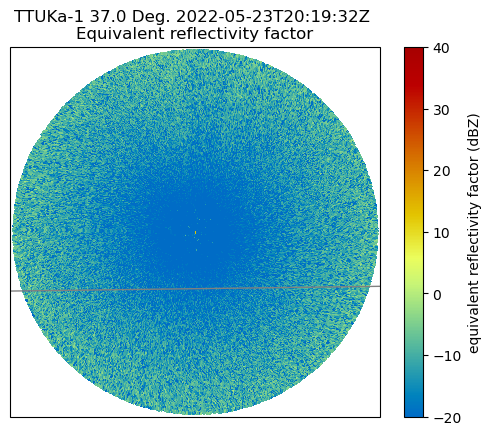

In [178]:
for r in vad_rows_ka1_radar.Radar:
    fig = plt.figure()
    display = pyart.graph.RadarMapDisplay(r)
    display.plot_ppi_map('reflectivity', vmin = -20, vmax = 40, figure=fig)
    radar_dt = pyart.util.datetime_from_radar(r)
    fig.savefig('/Users/juliabman/Desktop/morton_vads_reflectivity/'+ 'ka1_' +radar_dt.strftime('%Y-%m-%dT%H%M%S.%f')+'.png')
    plt.close(fig)

In [112]:
for r2 in vad_rows_ka2_radar.Radar:
    fig = plt.figure()
    display = pyart.graph.RadarMapDisplay(r2)
    display.plot_ppi_map('reflectivity', vmin = -20, vmax = 40, figure=fig)
    radar_dt = pyart.util.datetime_from_radar(r2)
    fig.savefig('/Users/juliabman/Desktop/morton_vads_reflectivity/'+ 'ka2_' +radar_dt.strftime('%Y-%m-%dT%H%M%S.%f')+'.png')
    plt.close(fig)

/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/pyart/graph/radarmapdisplay.py:317: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  warnings.warn(
/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/juliabman/miniforge3/envs/Research/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/juliabman/minifor

AttributeError: 'float' object has no attribute 'fields'

<Figure size 640x480 with 0 Axes>

In [66]:
np.shape(ka2_df_w_radar)

(325, 12)

In [67]:
np.shape(ka1_df_w_radar)

(307, 12)

In [68]:
np.shape(vad_rows_ka2_radar)

(176, 12)

In [69]:
np.shape(vad_rows_ka1_radar)

(155, 12)

In [115]:
vad_indeces_ka1 = vad_rows_ka1_radar.index
vad_indeces_ka2 = vad_rows_ka2_radar.index

In [124]:
vad_indeces_ka1

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194],
      dtype='int64', length=155)

In [123]:
vad_indeces_ka2

Index([  8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
       ...
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284],
      dtype='int64', length=176)

# from this point im trying to do with the vads what ive done in plot_attempts

In [71]:
tobac_features_xr = xr.open_dataset(tobac_file)
idx = tobac_features_xr['idx'].data
cell = tobac_features_xr['cell'].data
morton_storm_indeces_idx = np.where(idx == 29)
morton_storm_indeces = np.where(cell == 29)
print(morton_storm_indeces)
tobac_times = tobac_features_xr['time']
tobac_lats = np.array(tobac_features_xr['latitude'])
tobac_lons = np.array(tobac_features_xr['longitude'])

#morton_two_prior = morton_storm_indeces[405]
#morton_two_post = morton_storm_indeces[839]


morton_tobac_lats = tobac_lats[morton_storm_indeces]
morton_tobac_lons = tobac_lons[morton_storm_indeces]
morton_tobac_times = tobac_times[morton_storm_indeces]
morton_cell_idx_29 = cell[morton_storm_indeces]

#idx_29_lats = tobac_lats[morton_storm_indeces_idx]
#idx_29_lons = tobac_lons[morton_storm_indeces_idx]

morton_tobac_times_datetime = morton_tobac_times.astype('datetime64[s]')
print(morton_tobac_times_datetime)

# print(morton_tobac_lats)
# print(morton_tobac_lons)

(array([139, 147, 162, 172, 180, 187, 200, 236, 245, 253, 261, 268, 275,
       283, 291, 302, 312, 324, 334, 343, 352, 360, 368, 377, 390, 408,
       420, 432, 446, 460, 471, 482, 493, 503, 514, 524, 532, 542, 550,
       559, 567, 575, 587, 594, 607, 620, 637, 655, 676, 698, 718, 742,
       759, 787, 803, 826]),)
<xarray.DataArray 'time' (index: 56)>
array(['2022-05-23T22:21:17.000000000', '2022-05-23T22:25:49.000000000',
       '2022-05-23T22:30:32.000000000', '2022-05-23T22:35:17.000000000',
       '2022-05-23T22:40:16.000000000', '2022-05-23T22:45:14.000000000',
       '2022-05-23T22:50:12.000000000', '2022-05-23T23:10:02.000000000',
       '2022-05-23T23:14:59.000000000', '2022-05-23T23:19:29.000000000',
       '2022-05-23T23:23:59.000000000', '2022-05-23T23:28:42.000000000',
       '2022-05-23T23:33:27.000000000', '2022-05-23T23:38:26.000000000',
       '2022-05-23T23:43:24.000000000', '2022-05-23T23:48:21.000000000',
       '2022-05-23T23:53:19.000000000', '2022-05-23T23:58:1

/var/folders/4f/9s_4__q16tx5t8vmww4mv03h0000gn/T/ipykernel_44808/285991300.py:23: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  morton_tobac_times_datetime = morton_tobac_times.astype('datetime64[s]')


In [299]:
ka1_times_aligning_with_tobac = []
ka1_matching_lats = []
ka1_matching_lons = []
ka1_matching_bearing = []
ka1_matching_velocity = []

for a_tobac_time in morton_tobac_times_datetime:
    absolute_diff_between_times_again = np.abs(vad_rows_ka1_radar.Datetime.astype('datetime64[s]') - a_tobac_time.data)
    print(a_tobac_time.data)
    #print(array_dealiased_vad_ka1_times_datetime_0524)
    #print(absolute_diff_between_times_again)
    index_of_smallest_time_between_again = np.argmin(absolute_diff_between_times_again) # np.argmin returns the index of the min value
    # access the index of the smallest value
    #print(index_of_smallest_time_between_again)
    access_smallest_value_again = vad_rows_ka1_radar.Datetime.index[index_of_smallest_time_between_again]
    
    # tobac_lats_for_ka_again = latmean_array_ka1[index_of_smallest_time_between_again]
    # tobac_lons_for_ka_again = lonmean_array_ka1[index_of_smallest_time_between_again]
    # tobac_bearing_for_ka1 = bearmean_array_ka1[index_of_smallest_time_between_again]
    # tobac_vel_for_ka1 = velmean_array_ka1[index_of_smallest_time_between_again]
    tobac_lats_for_ka_again = vad_rows_ka1_radar.Latitude.index[index_of_smallest_time_between_again]
    tobac_lons_for_ka_again = vad_rows_ka1_radar.Longitude.index[index_of_smallest_time_between_again]
    tobac_bearing_for_ka1 = vad_rows_ka1_radar.Heading.index[index_of_smallest_time_between_again]
    tobac_vel_for_ka1 = vad_rows_ka1_radar.Speed.index[index_of_smallest_time_between_again]
    #print(f"the ka time is {a_ka_time}")
    #print(f" the tobac time is {access_smallest_value}")
    #print(index_of_smallest_time_between_again)
    ka1_times_aligning_with_tobac.append(access_smallest_value_again)
    ka1_matching_lats.append(tobac_lats_for_ka_again)
    ka1_matching_lons.append(tobac_lons_for_ka_again)
    ka1_matching_bearing.append(tobac_bearing_for_ka1)
    ka1_matching_velocity.append(tobac_vel_for_ka1)

2022-05-23T22:21:17.000000000
2022-05-23T22:25:49.000000000
2022-05-23T22:30:32.000000000
2022-05-23T22:35:17.000000000
2022-05-23T22:40:16.000000000
2022-05-23T22:45:14.000000000
2022-05-23T22:50:12.000000000
2022-05-23T23:10:02.000000000
2022-05-23T23:14:59.000000000
2022-05-23T23:19:29.000000000
2022-05-23T23:23:59.000000000
2022-05-23T23:28:42.000000000
2022-05-23T23:33:27.000000000
2022-05-23T23:38:26.000000000
2022-05-23T23:43:24.000000000
2022-05-23T23:48:21.000000000
2022-05-23T23:53:19.000000000
2022-05-23T23:58:17.000000000
2022-05-24T00:03:14.000000000
2022-05-24T00:08:13.000000000
2022-05-24T00:13:11.000000000
2022-05-24T00:18:09.000000000
2022-05-24T00:23:06.000000000
2022-05-24T00:29:41.000000000
2022-05-24T00:36:15.000000000
2022-05-24T00:42:49.000000000
2022-05-24T00:49:23.000000000
2022-05-24T00:55:57.000000000
2022-05-24T01:02:32.000000000
2022-05-24T01:09:06.000000000
2022-05-24T01:15:39.000000000
2022-05-24T01:22:14.000000000
2022-05-24T01:28:48.000000000
2022-05-24

In [301]:
ka2_times_aligning_with_tobac = []
ka2_matching_lats = []
ka2_matching_lons = []
ka2_matching_bearing = []
ka2_matching_velocity = []
ka2_matching_radar = []

for a_tobac_time2 in morton_tobac_times_datetime:
    absolute_diff_between_times_again2 = np.abs(vad_rows_ka2_radar.Datetime.astype('datetime64[s]') - a_tobac_time2.data)
    #print(a_tobac_time.data)
    #print(array_dealiased_vad_ka1_times_datetime_0524)
    #print(absolute_diff_between_times_again)
    index_of_smallest_time_between_again2 = np.argmin(absolute_diff_between_times_again2) # np.argmin returns the index of the min value
    # access the index of the smallest value
    #print(index_of_smallest_time_between_again)
    access_smallest_value_again2 = vad_rows_ka2_radar.Datetime.index[index_of_smallest_time_between_again2]
    tobac_lats_for_ka_again2 = vad_rows_ka2_radar.Latitude.index[index_of_smallest_time_between_again2]
    tobac_lons_for_ka_again2 = vad_rows_ka2_radar.Longitude.index[index_of_smallest_time_between_again2]
    tobac_bearing_for_ka2 = vad_rows_ka2_radar.Heading.index[index_of_smallest_time_between_again2]
    tobac_vel_for_ka2 = vad_rows_ka2_radar.Speed.index[index_of_smallest_time_between_again2]
    #print(f"the ka time is {a_ka_time}")
    #print(f" the tobac time is {access_smallest_value}")
    #print(index_of_smallest_time_between_again)
    ka2_times_aligning_with_tobac.append(access_smallest_value_again2)
    ka2_matching_lats.append(tobac_lats_for_ka_again2)
    ka2_matching_lons.append(tobac_lons_for_ka_again2)
    ka2_matching_bearing.append(tobac_bearing_for_ka2)
    ka2_matching_velocity.append(tobac_vel_for_ka2)
    ka2_matching_radar.append(tobac_radar_for_ka2)

In [302]:
np.size(ka1_matching_lats)

56

In [304]:
ka1_times_aligning_with_tobac

[33,
 42,
 52,
 61,
 71,
 74,
 87,
 111,
 111,
 118,
 127,
 137,
 140,
 158,
 158,
 164,
 174,
 184,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194]

In [305]:
ka1_matching_lats

[33,
 42,
 52,
 61,
 71,
 74,
 87,
 111,
 111,
 118,
 127,
 137,
 140,
 158,
 158,
 164,
 174,
 184,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194]

In [307]:
ka1_times_aligning_with_tobac = []
ka1_matching_lats = []
ka1_matching_lons = []
ka1_matching_bearing = []
ka1_matching_velocity = []
ka1_matching_radar = []
dealiased_datetime_vads_only_ka1 = array_dealiased_vad_ka1_times_datetime[vad_indeces_ka1]

for a_tobac_time in morton_tobac_times_datetime:
    absolute_diff_between_times_again = np.abs(dealiased_datetime_vads_only_ka1 - a_tobac_time.data)
    print(a_tobac_time.data)
    #print(array_dealiased_vad_ka1_times_datetime_0524)
    #print(absolute_diff_between_times_again)
    index_of_smallest_time_between_again = np.argmin(absolute_diff_between_times_again) # np.argmin returns the index of the min value
    # access the index of the smallest value
    #print(index_of_smallest_time_between_again)
    access_smallest_value_again = dealiased_datetime_vads_only_ka1[index_of_smallest_time_between_again]
    
    tobac_lats_for_ka_again = latmean_array_ka1[index_of_smallest_time_between_again]
    tobac_lons_for_ka_again = lonmean_array_ka1[index_of_smallest_time_between_again]
    tobac_bearing_for_ka1 = bearmean_array_ka1[index_of_smallest_time_between_again]
    tobac_vel_for_ka1 = velmean_array_ka1[index_of_smallest_time_between_again]
    tobac_radar_for_ka1 = radar_array_ka1[index_of_smallest_time_between_again]
    #print(f"the ka time is {a_ka_time}")
    #print(f" the tobac time is {access_smallest_value}")
    #print(index_of_smallest_time_between_again)
    ka1_times_aligning_with_tobac.append(access_smallest_value_again)
    ka1_matching_lats.append(tobac_lats_for_ka_again)
    ka1_matching_lons.append(tobac_lons_for_ka_again)
    ka1_matching_bearing.append(tobac_bearing_for_ka1)
    ka1_matching_velocity.append(tobac_vel_for_ka1)
    ka1_matching_radar.append(tobac_radar_for_ka1)

2022-05-23T22:21:17.000000000
2022-05-23T22:25:49.000000000
2022-05-23T22:30:32.000000000
2022-05-23T22:35:17.000000000
2022-05-23T22:40:16.000000000
2022-05-23T22:45:14.000000000
2022-05-23T22:50:12.000000000
2022-05-23T23:10:02.000000000
2022-05-23T23:14:59.000000000
2022-05-23T23:19:29.000000000
2022-05-23T23:23:59.000000000
2022-05-23T23:28:42.000000000
2022-05-23T23:33:27.000000000
2022-05-23T23:38:26.000000000
2022-05-23T23:43:24.000000000
2022-05-23T23:48:21.000000000
2022-05-23T23:53:19.000000000
2022-05-23T23:58:17.000000000
2022-05-24T00:03:14.000000000
2022-05-24T00:08:13.000000000
2022-05-24T00:13:11.000000000
2022-05-24T00:18:09.000000000
2022-05-24T00:23:06.000000000
2022-05-24T00:29:41.000000000
2022-05-24T00:36:15.000000000
2022-05-24T00:42:49.000000000
2022-05-24T00:49:23.000000000
2022-05-24T00:55:57.000000000
2022-05-24T01:02:32.000000000
2022-05-24T01:09:06.000000000
2022-05-24T01:15:39.000000000
2022-05-24T01:22:14.000000000
2022-05-24T01:28:48.000000000
2022-05-24

In [308]:
np.size(dealiased_datetime_vads_only_ka1)

155

In [310]:
np.size(ka1_times_aligning_with_tobac)

56

In [289]:
ka2_times_aligning_with_tobac = []
ka2_matching_lats = []
ka2_matching_lons = []
ka2_matching_bearing = []
ka2_matching_velocity = []
ka2_matching_radar = []
dealiased_datetime_vads_only_ka2 = array_dealiased_vad_ka2_times_datetime[vad_indeces_ka2]


for a_tobac_time2 in morton_tobac_times_datetime:
    absolute_diff_between_times_again2 = np.abs(dealiased_datetime_vads_only_ka2 - a_tobac_time2.data)
    #absolute_diff_between_times_again2 = np.abs(vad_rows_ka2_radar.Datetime.astype('datetime64[s]' - a_tobac_time2.data)
    #print(a_tobac_time.data)
    #print(array_dealiased_vad_ka1_times_datetime_0524)
    #print(absolute_diff_between_times_again)
    index_of_smallest_time_between_again2 = np.argmin(absolute_diff_between_times_again2) # np.argmin returns the index of the min value
    # access the index of the smallest value
    #print(index_of_smallest_time_between_again)
    access_smallest_value_again2 = dealiased_datetime_vads_only_ka2[index_of_smallest_time_between_again2]
    tobac_lats_for_ka_again2 = latmean_array_ka2[index_of_smallest_time_between_again2]
    tobac_lons_for_ka_again2 = lonmean_array_ka2[index_of_smallest_time_between_again2]
    tobac_bearing_for_ka2 = bearmean_array_ka2[index_of_smallest_time_between_again2]
    tobac_vel_for_ka2 = velmean_array_ka2[index_of_smallest_time_between_again2]
    tobac_radar_for_ka2 = radar_array_ka2[index_of_smallest_time_between_again2]
    #print(f"the ka time is {a_ka_time}")
    #print(f" the tobac time is {access_smallest_value}")
    #print(index_of_smallest_time_between_again)
    ka2_times_aligning_with_tobac.append(access_smallest_value_again2)
    ka2_matching_lats.append(tobac_lats_for_ka_again2)
    ka2_matching_lons.append(tobac_lons_for_ka_again2)
    ka2_matching_bearing.append(tobac_bearing_for_ka2)
    ka2_matching_velocity.append(tobac_vel_for_ka2)
    ka2_matching_radar.append(tobac_radar_for_ka2)

IndexError: index 267 is out of bounds for axis 0 with size 258

In [288]:
np.size(dealiased_datetime_vads_only_ka2)

158

In [292]:
vad_indeces_ka2

Index([  8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
       ...
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284],
      dtype='int64', length=176)

In [293]:
array_dealiased_vad_ka2_times_datetime

array(['2022-05-23T22:07:37', '2022-05-23T22:08:09',
       '2022-05-23T22:08:39', '2022-05-23T22:09:10',
       '2022-05-23T22:09:41', '2022-05-23T22:10:11',
       '2022-05-23T22:10:42', '2022-05-23T22:11:12',
       '2022-05-23T22:11:44', '2022-05-23T22:12:14',
       '2022-05-23T22:12:44', '2022-05-23T22:13:14',
       '2022-05-23T22:13:45', '2022-05-23T22:14:14',
       '2022-05-23T22:14:45', '2022-05-23T22:15:15',
       '2022-05-23T22:15:45', '2022-05-23T22:16:15',
       '2022-05-23T22:16:46', '2022-05-23T22:17:15',
       '2022-05-23T22:17:46', '2022-05-23T22:18:16',
       '2022-05-23T22:18:46', '2022-05-23T22:19:16',
       '2022-05-23T22:19:46', '2022-05-23T22:20:16',
       '2022-05-23T22:20:46', '2022-05-23T22:21:16',
       '2022-05-23T22:21:46', '2022-05-23T22:22:16',
       '2022-05-23T22:22:46', '2022-05-23T22:23:16',
       '2022-05-23T22:23:46', '2022-05-23T22:24:17',
       '2022-05-23T22:24:47', '2022-05-23T22:25:18',
       '2022-05-23T22:25:47', '2022-05-23T22:2

In [157]:
# from stackoverflow (https://stackoverflow.com/questions/639695/how-to-convert-latitude-or-longitude-to-meters)
# originally in javascript
def measure(lat1, lon1, lat2, lon2):  # generally used geo measurement function
    R = 6378.137 # Radius of earth in KM
    dLat = lat2 * np.pi / 180 - lat1 * np.pi / 180;
    dLon = lon2 * np.pi / 180 - lon1 * np.pi / 180;
    a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(lat1 * np.pi / 180) * np.cos(lat2 * np.pi / 180) * np.sin(dLon/2) * np.sin(dLon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    #d_meters = d * 1000
    return d # km

In [158]:
ka1_distance_from_storm = []
for index in np.arange(0, len(ka1_matching_lats)):
    distance = measure(morton_tobac_lats[index], morton_tobac_lons[index], ka1_matching_lats[index], ka1_matching_lons[index])
    ka1_distance_from_storm.append(distance)

In [159]:
ka1_distance_from_storm

[27.14262969732735,
 23.90024951586406,
 20.534669597298016,
 16.776654489728674,
 14.679339041245424,
 12.17501127986674,
 10.375358248517498,
 3.585518300547256,
 2.7949907497606836,
 7.717929851585905,
 7.346862948332469,
 14.477497643368476,
 15.13284462180529,
 18.991648152047343,
 19.37988913148566,
 13.127672883102983,
 9.128172836835814,
 7.497159683109005,
 7.810332589752542,
 12.295281276699088,
 10.87464964746534,
 9.092907996510545,
 6.89907811641454,
 6.4269685125664395,
 5.178534788519128,
 3.8617239016807545,
 7.438218928833932,
 8.561072254393688,
 8.752012093547325,
 8.702716669920656,
 10.186389180275254,
 12.352667167039572,
 13.822991177262601,
 16.58649553147895,
 19.410965760765453,
 23.698518038331983,
 26.79279196837319,
 31.27530561386816,
 33.41049800135948,
 36.780218594938404,
 40.0022557000804,
 43.151411117477984,
 45.5247077228611,
 47.43902662833372,
 50.42820265748184,
 54.18204679331633,
 57.49072759781149,
 61.05861102169259,
 63.31432730656592,
 64.8

In [160]:
ka2_distance_from_storm = []
for index in np.arange(0, len(ka2_matching_lats)):
    distance = measure(morton_tobac_lats[index], morton_tobac_lons[index], ka2_matching_lats[index], ka2_matching_lons[index])
    ka2_distance_from_storm.append(distance)

In [161]:
from math import sin, cos, sqrt, atan2, radians

def calc_velocity(lat1,lon1,lat2,lon2,time1,time2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c * 1000 # Distance in m
    return d / (time2 - time1) # dividing by 1e9 because the times are in nanoseconds

def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = cos(radians(lat2)) * sin(radians(dLon))
    y = cos(radians(lat1)) * sin(radians(lat2)) - sin(radians(lat1)) * cos(radians(lat2)) * cos(radians(dLon))
    brng = np.arctan2(x,y)
    brng = (np.degrees(brng)+180) % 360
    return brng

In [162]:
storm_velocity=[]
storm_direction=[]
time_initial = ka1_times_aligning_with_tobac[0].astype(float)
time_final = ka1_times_aligning_with_tobac[-1].astype(float)

for i in np.arange(0,len(morton_tobac_lons)-1,1): # using storm_lat as length makes these plots different that plot test 2, which uses length of storm location csv
    velocity = calc_velocity(morton_tobac_lats[i], morton_tobac_lons[i],
                             morton_tobac_lats[i+1],morton_tobac_lons[i+1],
                             time_initial, time_final)
                             #storm_decimalsec[i],storm_decimalsec[i+1])
    storm_velocity.append(velocity)
    
    direction = get_bearing(morton_tobac_lats[i],morton_tobac_lons[i],
                            morton_tobac_lats[i+1], morton_tobac_lons[i+1])
    storm_direction.append(direction)
    
storm_velocity = np.append([np.nan],storm_velocity) # in meters/sec
storm_direction = np.append([np.nan],storm_direction) # in degrees

In [163]:
storm_directiondf = pd.DataFrame(storm_direction)

direction_corrected = storm_directiondf.dropna()

avg_storm_direction = np.average(direction_corrected)

In [164]:
direction_corrected_array = np.array(direction_corrected)

In [165]:
weights = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
storm_direction_weighted = []

for i in range(len((direction_corrected))):
    j = i+2 # if we start any further it'll loop to the back values of the array and average them
    #print(j)
    storm_direction_over_25_minutes = np.array([direction_corrected_array[j-2], direction_corrected_array[j-1], 
                                            direction_corrected_array[j], direction_corrected_array[j+1], direction_corrected_array[j+2]])
    #print(storm_direction_over_25_minutes)
    flat = storm_direction_over_25_minutes.flatten()
    #print(np.shape(flat))
    #print(np.shape(weights))
    #print(storm_direction_over_25_minutes)
    #storm_avg_weighted = sum(storm_direction_over_25_minutes * weights)/ sum(weights)
    storm_avg_weighted = np.average(flat, weights = weights)
    #print(storm_avg_weighted)
    storm_direction_weighted.append(storm_avg_weighted)

IndexError: index 55 is out of bounds for axis 0 with size 55

In [166]:
#print(np.size(storm_direction_weighted)) # storm_direction_weighted cant do all 55 since there arent enough indeces to weight; 
                                # ie once it reaches 54 it cant go 2 beyond for the weighted avg
storm_direction_weighted_array = np.array(storm_direction_weighted)

In [167]:
storm_directiondf = pd.DataFrame(storm_direction_weighted)

direction_corrected = storm_directiondf.dropna()

avg_storm_direction = np.average(direction_corrected)

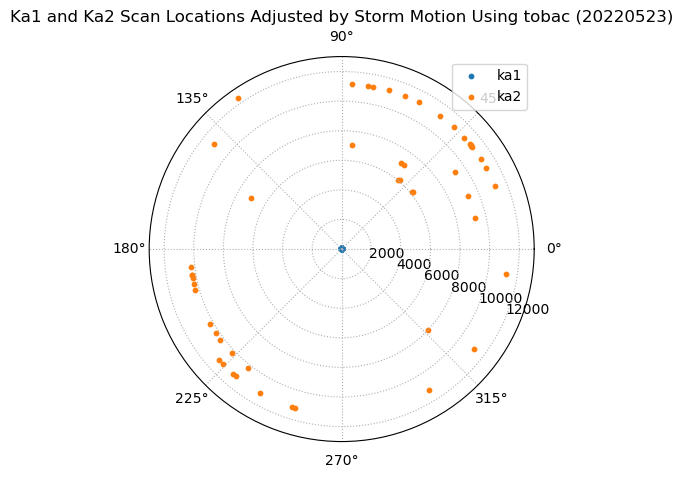

In [168]:
# bring in the figure

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection = 'polar')
ax.set_rmax(2)
#ax.set_rticks(distance_grid)
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True, linestyle = ':') # makes grid lines dotted
#ax.set_theta_zero_location('W', avg_storm_direction) # what is the N, S, E, W good for?
#ax.set_theta_offset(avg_storm_direction)
ax.set_title("Ka1 and Ka2 Scan Locations Adjusted by Storm Motion Using tobac (20220523)")
ax.plot()

# now that we have the figure set up, we can plot on it
# r --> great circle distance from lat and lon of storm to lat and lon of vehicle
# theta --> corrected bearing
# in polar plots the order of plotting is (theta, r)
theta = ka1_matching_bearing[2:53] - np.array(storm_direction_weighted) - 90 # adjust for true north in bearing calc being 90
theta_radians = theta * (np.pi/180)
r = ka1_distance_from_storm[2:53]# - np.array(ka1_matching_velocity) - np.array(storm_velocity)

#print(theta_radians)
#print(r)
#print(np.shape(theta))
#print(np.size(r))

theta2 = ka2_matching_bearing[2:53] - np.array(storm_direction_weighted) - 90
theta2_radians = theta2 * (np.pi/180)
r2 = ka2_distance_from_storm[2:53]# - np.array(ka2_matching_velocity) - np.array(storm_velocity)

#print(theta2_radians)
#print(r2)

ka1 = ax.scatter(theta_radians, r, s = 10) # s changes point size
ka2 = ax.scatter(theta2_radians, r2, s = 10)

ax.legend(['ka1', 'ka2'])
# plt.savefig('/Users/juliabman/Desktop/Seminar_Pictures/both_ka_positions.png')
plt.show()

In [276]:
ka1_times_aligning_with_tobac = []
ka1_matching_lats = []
ka1_matching_lons = []
ka1_matching_bearing = []
ka1_matching_velocity = []
ka1_matching_radar = []
dealiased_datetime_vads_only_ka1 = array_dealiased_vad_ka1_times_datetime[vad_indeces_ka1]

for a_time in dealiased_datetime_vads_only_ka1:
    absolute_diff_between_times_again = np.abs(morton_tobac_times_datetime - a_time)
    print(a_time)
    #print(array_dealiased_vad_ka1_times_datetime_0524)
    #print(absolute_diff_between_times_again)
    index_of_smallest_time_between_again = np.argmin(absolute_diff_between_times_again) # np.argmin returns the index of the min value
    # access the index of the smallest value
    #print(index_of_smallest_time_between_again)
    access_smallest_value_again = dealiased_datetime_vads_only_ka1[index_of_smallest_time_between_again]
    
    tobac_lats_for_ka_again = latmean_array_ka1[index_of_smallest_time_between_again]
    tobac_lons_for_ka_again = lonmean_array_ka1[index_of_smallest_time_between_again]
    tobac_bearing_for_ka1 = bearmean_array_ka1[index_of_smallest_time_between_again]
    tobac_vel_for_ka1 = velmean_array_ka1[index_of_smallest_time_between_again]
    tobac_radar_for_ka1 = radar_array_ka1[index_of_smallest_time_between_again]
    #print(f"the ka time is {a_ka_time}")
    #print(f" the tobac time is {access_smallest_value}")
    #print(index_of_smallest_time_between_again)
    ka1_times_aligning_with_tobac.append(access_smallest_value_again)
    ka1_matching_lats.append(tobac_lats_for_ka_again)
    ka1_matching_lons.append(tobac_lons_for_ka_again)
    ka1_matching_bearing.append(tobac_bearing_for_ka1)
    ka1_matching_velocity.append(tobac_vel_for_ka1)
    ka1_matching_radar.append(tobac_radar_for_ka1)

2022-05-23T20:18:19


ValueError: dimensions ('index',) must have the same length as the number of data dimensions, ndim=0

In [189]:
tobac_times_nearest_to_ka1_indeces = []
for a_time in dealiased_datetime_vads_only_ka1:
    nearest = find_nearest(morton_tobac_times_datetime, a_time)
    tobac_times_nearest_to_ka1_indeces.append(nearest)

In [190]:
tobac_times_nearest_to_ka1 = morton_tobac_times_datetime[tobac_times_nearest_to_ka1_indeces]

In [191]:
tobac_times_nearest_to_ka1

<xarray.DataArray 'time' (index: 155)>
array(['2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:21:17.000000000',
       '2022-05-23T22:21:17.000000000', '2022-05-23T22:25:49.000000000',
       '2022-05-23T22:25:49.000000000', '2022-05-23T22:25:49.000000000',
       '2022-05-23T22:25:49.000000000', '2022-05-23T22:25:49.000000000',
...
       '2022-05-23T23:28:42.000000000', '2022-05-23T23:28:42.000000000',
       '2022-05-23T23:43:24.000000000', '2022-05-23T23:43:24.000000000',
       '2022-05-23T23:48:21.000000000', '2022-05-23T23:48:21.000000000',
       '2022-05-23T23:48:21.000000000', '2022-05-23T23:48:21.000000000',
       '2022-05-23T23:48:21.000000000', '2022-05-23T23:48:21.000000000',
       '2022-05-23T23:48:21.000000000', '2022-05-23T23:48:21.000000000',
       '2022-05-23T23:48:21.000000000', '2022-05-23T23:48:21.000000000',
       '2022-05-23T23:53:19.000000000', '2022-05-23T23:53:19.000000000',
       '2022-05-23T23:53:19.000000000', '2022-05-23T23:53:19.000000000',
       '2022-05-23T23:53:19.000000000', '2022-05-23T23:53:19.000000000',
       '2022-05-23T23:53:19.000000000', '2022-05-23T23:53:19.000000000',
       '2022-05-23T23:53:19.000000000', '2022-05-23T23:53:19.000000000',
       '2022-05-23T23:58:17.000000000', '2022-05-23T23:58:17.000000000',
       '2022-05-23T23:58:17.000000000', '2022-05-23T23:58:17.000000000',
       '2022-05-23T23:58:17.000000000', '2022-05-23T23:58:17.000000000',
       '2022-05-23T23:58:17.000000000', '2022-05-23T23:58:17.000000000',
       '2022-05-23T23:58:17.000000000', '2022-05-23T23:58:17.000000000',
       '2022-05-24T00:03:14.000000000', '2022-05-24T00:03:14.000000000',
       '2022-05-24T00:03:14.000000000', '2022-05-24T00:03:14.000000000',
       '2022-05-24T00:03:14.000000000'], dtype='datetime64[ns]')
Coordinates:
  * index    (index) int64 139 139 139 139 139 139 ... 324 334 334 334 334 334

In [192]:
tobac_times_nearest_to_ka2_indeces = []
for a_time2 in dealiased_datetime_vads_only_ka2:
    nearest2 = find_nearest(morton_tobac_times_datetime, a_time2)
    tobac_times_nearest_to_ka2_indeces.append(nearest2)

In [193]:
tobac_times_nearest_to_ka2 = morton_tobac_times_datetime[tobac_times_nearest_to_ka2_indeces]

In [201]:
storm_velocity=[]
storm_direction=[]
time_initial = ka1_times_aligning_with_tobac[0].astype(float)
time_final = ka1_times_aligning_with_tobac[-1].astype(float)

for i in np.arange(0,len(morton_tobac_lons)-1,1): # using storm_lat as length makes these plots different that plot test 2, which uses length of storm location csv
    velocity = calc_velocity(morton_tobac_lats[i], morton_tobac_lons[i],
                             morton_tobac_lats[i+1],morton_tobac_lons[i+1],
                             time_initial, time_final)
                             #storm_decimalsec[i],storm_decimalsec[i+1])
    storm_velocity.append(velocity)
    
    direction = get_bearing(morton_tobac_lats[i],morton_tobac_lons[i],
                            morton_tobac_lats[i+1], morton_tobac_lons[i+1])
    storm_direction.append(direction)
    
storm_velocity = np.append([np.nan],storm_velocity) # in meters/sec
storm_direction = np.append([np.nan],storm_direction) # in degrees

In [202]:
np.size(storm_velocity)

56

In [236]:
np.shape(vad_rows_ka2_radar.Longitude)

(176,)

In [248]:
tobac_lats_nearest_to_ka1_indeces = []
for a_lat in vad_rows_ka1_radar.Latitude:
    nearest = find_nearest(morton_tobac_lats, a_lat)
    tobac_lats_nearest_to_ka1_indeces.append(nearest)

tobac_lats_nearest_to_ka2_indeces = []
for a_lat2 in vad_rows_ka2_radar.Latitude:
    nearest2 = find_nearest(morton_tobac_lats, a_lat2)
    tobac_lats_nearest_to_ka2_indeces.append(nearest2)

tobac_lons_nearest_to_ka1_indeces = []
for a_lon in vad_rows_ka1_radar.Longitude:
    nearest3 = find_nearest(morton_tobac_lats, a_lon)
    tobac_lons_nearest_to_ka1_indeces.append(nearest3)

tobac_lons_nearest_to_ka2_indeces = []
for a_lon2 in vad_rows_ka2_radar.Longitude:
    nearest4 = find_nearest(morton_tobac_lats, a_lon2)
    tobac_lons_nearest_to_ka2_indeces.append(nearest4)

In [249]:
tobac_lats_nearest_to_ka1 = morton_tobac_lats[tobac_lats_nearest_to_ka1_indeces]
tobac_lats_nearest_to_ka2 = morton_tobac_lats[tobac_lats_nearest_to_ka2_indeces]

tobac_lons_nearest_to_ka1 = morton_tobac_lons[tobac_lons_nearest_to_ka1_indeces]
tobac_lons_nearest_to_ka2 = morton_tobac_lons[tobac_lons_nearest_to_ka2_indeces]

In [250]:
storm_velocity_ka1_list=[]
storm_direction_ka1_list=[]
time_initial_ka1 = ka1_times_aligning_with_tobac[0].astype(float)
time_final_ka1 = ka1_times_aligning_with_tobac[-1].astype(float)

for i in np.arange(0,len(tobac_lats_nearest_to_ka1)-1,1): # using storm_lat as length makes these plots different that plot test 2, which uses length of storm location csv
    velocity = calc_velocity(tobac_lats_nearest_to_ka1[i], tobac_lons_nearest_to_ka1[i],
                             tobac_lats_nearest_to_ka1[i+1],tobac_lons_nearest_to_ka1[i+1],
                             time_initial_ka1, time_final_ka1)
                             #storm_decimalsec[i],storm_decimalsec[i+1])
    storm_velocity_ka1_list.append(velocity)
    
    direction = get_bearing(tobac_lats_nearest_to_ka1[i],tobac_lons_nearest_to_ka1[i],
                            tobac_lats_nearest_to_ka1[i+1], tobac_lons_nearest_to_ka1[i+1])
    storm_direction_ka1_list.append(direction)
    
storm_velocity_ka1 = np.append([np.nan],storm_velocity_ka1_list) # in meters/sec
storm_direction_ka1 = np.append([np.nan],storm_direction_ka1_list) # in degrees

In [251]:
storm_velocity_ka2_list=[]
storm_direction_ka2_list=[]
time_initial_ka2 = ka2_times_aligning_with_tobac[0].astype(float)
time_final_ka2 = ka2_times_aligning_with_tobac[-1].astype(float)

for i in np.arange(0,len(tobac_lats_nearest_to_ka2)-1,1): # using storm_lat as length makes these plots different that plot test 2, which uses length of storm location csv
    velocity2 = calc_velocity(tobac_lats_nearest_to_ka2[i], tobac_lons_nearest_to_ka2[i],
                             tobac_lats_nearest_to_ka2[i+1],tobac_lons_nearest_to_ka2[i+1],
                             time_initial_ka2, time_final_ka2)
                             #storm_decimalsec[i],storm_decimalsec[i+1])
    storm_velocity_ka2_list.append(velocity2)
    
    direction2 = get_bearing(tobac_lats_nearest_to_ka2[i],tobac_lons_nearest_to_ka2[i],
                            tobac_lats_nearest_to_ka2[i+1], tobac_lons_nearest_to_ka2[i+1])
    storm_direction_ka2_list.append(direction2)
    
storm_velocity_ka2 = np.append([np.nan],storm_velocity_ka2_list) # in meters/sec
storm_direction_ka2 = np.append([np.nan],storm_direction_ka2_list) # in degrees

In [252]:
storm_directiondf_ka1 = pd.DataFrame(storm_direction_ka1)

direction_corrected_ka1 = storm_directiondf_ka1.dropna()

direction_corrected_array_ka1 = np.array(direction_corrected_ka1)

In [253]:
storm_directiondf_ka2 = pd.DataFrame(storm_direction_ka2)

direction_corrected_ka2 = storm_directiondf_ka2.dropna()

direction_corrected_array_ka2 = np.array(direction_corrected_ka2)

In [254]:
weights = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
storm_direction_weighted_ka1 = []

for i in range(len((direction_corrected_ka1))):
    j = i+2 # if we start any further it'll loop to the back values of the array and average them
    #print(j)
    storm_direction_over_25_minutes_ka1 = np.array([direction_corrected_array_ka1[j-2], direction_corrected_array_ka1[j-1], 
                                            direction_corrected_array_ka1[j], direction_corrected_array_ka1[j+1], direction_corrected_array_ka1[j+2]])
    #print(storm_direction_over_25_minutes)
    flat_ka1 = storm_direction_over_25_minutes_ka1.flatten()
    #print(np.shape(flat))
    #print(np.shape(weights))
    #print(storm_direction_over_25_minutes)
    #storm_avg_weighted = sum(storm_direction_over_25_minutes * weights)/ sum(weights)
    storm_avg_weighted_ka1 = np.average(flat_ka1, weights = weights)
    #print(storm_avg_weighted)
    storm_direction_weighted_ka1.append(storm_avg_weighted_ka1)

IndexError: index 154 is out of bounds for axis 0 with size 154

In [255]:
weights = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
storm_direction_weighted_ka2 = []

for i in range(len((direction_corrected_ka2))):
    j2 = i+2 # if we start any further it'll loop to the back values of the array and average them
    #print(j)
    storm_direction_over_25_minutes_ka2 = np.array([direction_corrected_array_ka2[j2-2], direction_corrected_array_ka2[j2-1], 
                                            direction_corrected_array_ka2[j2], direction_corrected_array_ka2[j2+1], direction_corrected_array_ka2[j2+2]])
    #print(storm_direction_over_25_minutes)
    flat_ka2 = storm_direction_over_25_minutes_ka2.flatten()
    #print(np.shape(flat))
    #print(np.shape(weights))
    #print(storm_direction_over_25_minutes)
    #storm_avg_weighted = sum(storm_direction_over_25_minutes * weights)/ sum(weights)
    storm_avg_weighted_ka2 = np.average(flat_ka2, weights = weights)
    #print(storm_avg_weighted)
    storm_direction_weighted_ka2.append(storm_avg_weighted_ka1)

IndexError: index 175 is out of bounds for axis 0 with size 175

In [256]:
#print(np.size(storm_direction_weighted)) # storm_direction_weighted cant do all 55 since there arent enough indeces to weight; 
                                # ie once it reaches 54 it cant go 2 beyond for the weighted avg
storm_direction_weighted_array_ka1 = np.array(storm_direction_weighted_ka1)
storm_direction_weighted_array_ka2 = np.array(storm_direction_weighted_ka2)

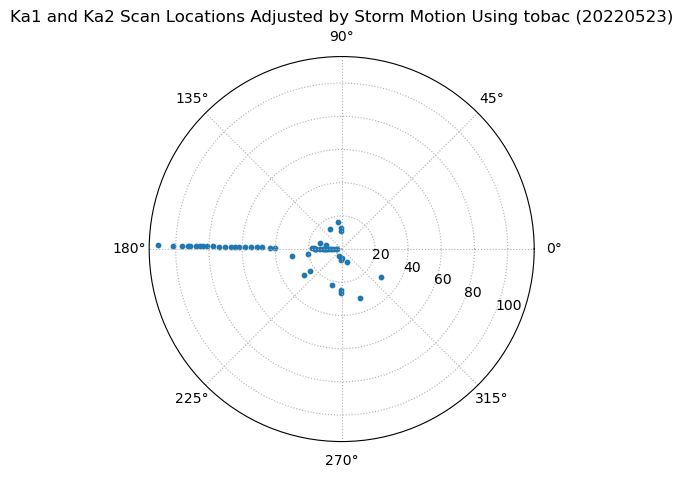

In [286]:
# bring in the figure

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(projection = 'polar')
ax.set_rmax(2)
#ax.set_rticks(distance_grid)
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True, linestyle = ':') # makes grid lines dotted
#ax.set_theta_zero_location('W', avg_storm_direction) # what is the N, S, E, W good for?
#ax.set_theta_offset(avg_storm_direction)
ax.set_title("Ka1 and Ka2 Scan Locations Adjusted by Storm Motion Using tobac (20220523)")
ax.plot()

# now that we have the figure set up, we can plot on it
# r --> great circle distance from lat and lon of storm to lat and lon of vehicle
# theta --> corrected bearing
# in polar plots the order of plotting is (theta, r)
theta = ka1_matching_bearing[0:56] - np.array(storm_direction_weighted_ka1)[0:56] - 90 # adjust for true north in bearing calc being 90
theta_radians = theta * (np.pi/180)
r = ka1_distance_from_storm# - np.array(ka1_matching_velocity) - np.array(storm_velocity)

#print(theta_radians)
#print(r)
#print(np.shape(theta))
#print(np.size(r))

#theta2 = ka2_matching_bearing - np.array(storm_direction_weighted_ka2)[0:56] - 90
#theta2_radians = theta2 * (np.pi/180)
#r2 = ka2_distance_from_storm[0:56]# - np.array(ka2_matching_velocity) - np.array(storm_velocity)

#print(theta2_radians)
#print(r2)

ka1 = ax.scatter(theta_radians, r, s = 10) # s changes point size
#ka2 = ax.scatter(theta2_radians, r2, s = 10)

#ax.legend(['ka1', 'ka2'])
# plt.savefig('/Users/juliabman/Desktop/Seminar_Pictures/both_ka_positions.png')
plt.show()

In [281]:
np.size(theta_radians)

56

In [271]:
np.size(r)

56